<a href="https://colab.research.google.com/github/ChesneeMurdock/Enron-Email_Supervised-Machine-Learning-Project/blob/main/Enron_Email_Dataset_Machine_Learning_Supervised_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction: Machine Learning Supervised Classification Project**

##**Purpose of project: Detecting Spam Messages**

### **Consists of 1 file: Enron Email Dataset**
emails.csv(1.43 GB): 5,574 messages

### **Type of Project:**
Building a Predictive Classification Model to detect Spam messages with high accuracry, precision, and recall.

### **Steps for the project**
* Vectorize the Text Data iwth TF-IDF

* Use Oversampling to balance classes using RandomOverSampler

* Trained a classifier on the resampled data using Logistic Regression

Then, compare results using a Neural Network. ***Which approach would be better***?

* Applied Text Tokenization and Padding to convert email text into sequences of words

* Truncate them to equal length to put into a neural network

* Compiled and trained the model


### **Packages used:**
* import kagglehub
* import pandas as pd
* import numpy as np
* import matplotlib.pyplot as plt
* import os
* import seaborn as sns
* import nltk
* from nltk.corpus import stopwords
* from wordcloud import WordCloud
* from sklearn.model_selection import train_test_split
* from sklearn.feature_extraction.text import TfidfVectorizer
* from sklearn.naive_bayes import MultinomialNB
* from sklearn.metrics import classification_report
* from imblearn.over_sampling import RandomOverSampler
* from sklearn.metrics import confusion_matrix
* from tensorflow.keras.preprocessing.text import Tokenizer
* from tensorflow.keras.preprocessing.sequence import pad_sequences
* from tensorflow.keras.models import Sequential
* from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
* from sklearn.metrics import precision_recall_curve
* !pip install tensorflow









---



# **Importing Libraries and Reading Data**

In [39]:
# Import Enron Email dataset
# Binary Classification Prediciton for Spam emails for Enron Emails

# Import packages
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import nltk # Natural language processing
import tensorflow as tf
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

!pip install tensorflow

# Downloading NLTK data
nltk.download('stopwords')   # Downloading stopwords data
nltk.download('punkt')       # Downloading tokenizer data

# Download latest version
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

print("Path to dataset files:", path)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Path to dataset files: /kaggle/input/sms-spam-collection-dataset


In [40]:
# Verify GPU or CPU
print(tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

2.18.0
Num GPUs Available: 0


In [41]:
# Find the correct filename by listing all files in 'path'
print(os.listdir(path))

['spam.csv']


In [42]:
# Read the CSV file into a DataFrame
data = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding='latin1')



---



# **Explore the Data**

In [43]:
# To see features and target variable
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [44]:
# View the column names
print(data.columns)

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [45]:
# Load and Clean Data

# Keep only relevant columns and rename them
data = data[['v1', 'v2']]  #.copy()
data.columns = ['label', 'text']

# Convert labels to binary values
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Drop any rows with missing labels or duplicates
data = data.dropna(subset=['label']).drop_duplicates().reset_index(drop=True)

# --- Quick Summary Stats ---

print("Dataset shape:", data.shape)
print("\nMissing values:\n", data.isnull().sum())
print("\nDuplicate rows:", data.duplicated().sum())
print("\nLabel counts:\n", data['label'].value_counts())

# Styling in Jupyter notebook

data.head().style.set_table_styles([
    {"selector": "th", "props": [("color", 'black'), ("background-color", "#00BFFF")]}
])

Dataset shape: (5169, 2)

Missing values:
 label    0
text     0
dtype: int64

Duplicate rows: 0

Label counts:
 label
0    4516
1     653
Name: count, dtype: int64


,label,text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives around here though"




---



# **Exploring the Data with Visualizations**

In [46]:
# Count how many spam and ham messages
values = data['label'].value_counts()
total = values.sum()

percentage_ham = (values[0] / total) * 100
percentage_spam = (values[1] / total) * 100

print(f'Ham (0): {percentage_ham:.2f}%')
print(f'Spam (1): {percentage_spam:.2f}%')

Ham (0): 87.37%
Spam (1): 12.63%


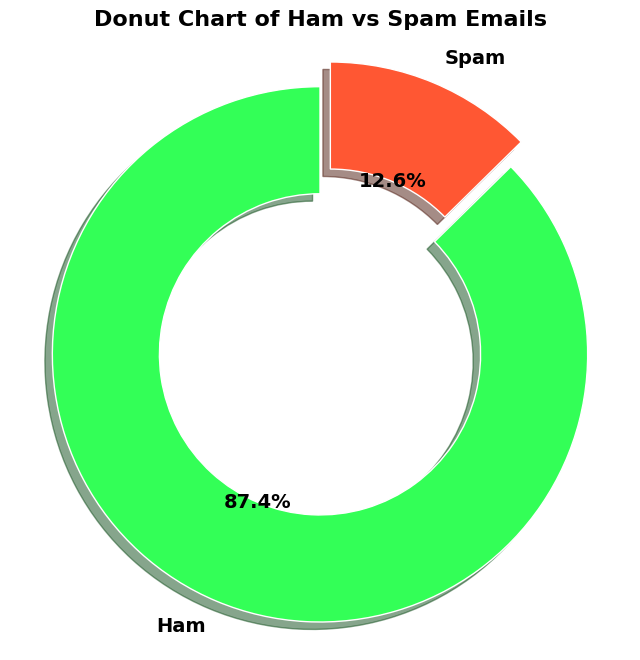

In [47]:
# Donut Chart
labels = ['Ham', 'Spam']
sizes = [values[0], values[1]]
colors = ['#33FF57', '#FF5733']
explode = (0, 0.1)

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    sizes, labels=labels, autopct='%1.1f%%',
    startangle=90, colors=colors, explode=explode, shadow=True,
    wedgeprops=dict(width=0.4, edgecolor='white')  # Makes it a donut
)

for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold')
    autotext.set(size=14, weight='bold')

ax.set_title('Donut Chart of Ham vs Spam Emails', fontsize=16, fontweight='bold')
ax.axis('equal')
plt.show()

This is comparison is clearly imbalanced. In binary classification problems, a dataset is **balanced** if both classes are roughly equal proportionately. This dataset is imbalanced because Ham significantly outweighs Spam.

A naive model coudl predict everything as "Ham" but will be useless at predicting "Spam" (poor recall for the minority class).

In [48]:
# Training and Predicting Spam messages

# Split the data
X = data['text']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Make predictions
y_pred = model.predict(X_test_vec)

# Evaluate the model
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.96      1.00      0.98       903
        Spam       0.99      0.74      0.85       131

    accuracy                           0.97      1034
   macro avg       0.98      0.87      0.91      1034
weighted avg       0.97      0.97      0.96      1034



Recall was not great. I want to catch as much spam as I can.

I will use Oversampling to boost recall for Spam messages. Hopefully this will give me a better balance in the training data.

In [49]:
# Use Oversampling to boost recall for spam messages
ros = RandomOverSampler(random_state=42) # Better balance in the training data

# Vectorized features X_train_vec; hope to see more spam during training
X_resampled, y_resampled = ros.fit_resample(X_train_vec, y_train)

In [50]:
# Train the model on the resampled data
model = MultinomialNB()
model.fit(X_resampled, y_resampled)

# Predict on original test set
y_pred_ros = model.predict(X_test_vec)

# Evaluate again
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_ros, target_names=['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       1.00      0.97      0.98       903
        Spam       0.82      0.97      0.89       131

    accuracy                           0.97      1034
   macro avg       0.91      0.97      0.94      1034
weighted avg       0.97      0.97      0.97      1034



Spam recall went up tremendously. F1 score overall was better as well. Precision did drop but that was to be expected.

In [51]:
# Compare models
print("Before Oversampling:")
print(classification_report(y_test, y_pred))

print("After Oversampling:")
print(classification_report(y_test, y_pred_ros))

Before Oversampling:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       903
           1       0.99      0.74      0.85       131

    accuracy                           0.97      1034
   macro avg       0.98      0.87      0.91      1034
weighted avg       0.97      0.97      0.96      1034

After Oversampling:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       903
           1       0.82      0.97      0.89       131

    accuracy                           0.97      1034
   macro avg       0.91      0.97      0.94      1034
weighted avg       0.97      0.97      0.97      1034



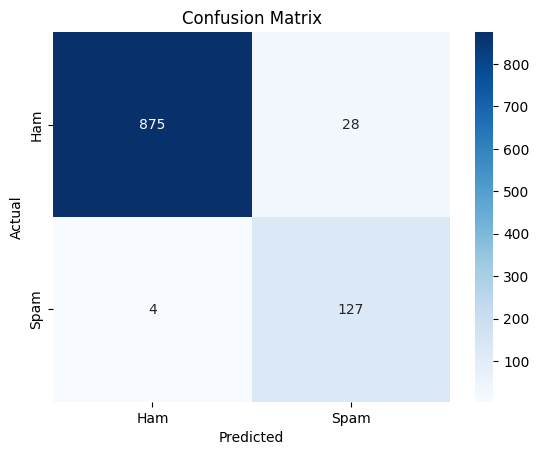

In [52]:
# Visualize what is being caught and missed
cm = confusion_matrix(y_test, y_pred_ros)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

I tried running a Logistic Regression as well as a Random Forest Classifier. No improvements were made. I have extracted all the performance I can from the model.

Now, I will try a Neural Classifier. Using Keras (TensorFlow) and Tokenizer, I might potentially catch hard-to-spot Spam messages that were missed by tradional models.

In [53]:
# Neural Network for Text Classification

# Force CPU usage to avoid graph execution errors
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

# Sanity check to drop any remaining NaN rows (if any slipped in)
data = data.dropna(subset=['label'])

# Step 1: Split data
X = data['text']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


# Step 2: Tokenize and pad sequences
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=100, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=100, padding='post', truncating='post')

# Convert to NumPy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# Cast labels to float32 for model training
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Step 3: Build model (same as before)
model = Sequential([
    Embedding(input_dim=10000, output_dim=16),
    GlobalAveragePooling1D(),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Compute class weights
from sklearn.utils import class_weight

weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights = {0: weights[0], 1: weights[1]}

# Step 4: Train with weights
model.fit(X_train_pad, y_train, epochs=10,
          validation_data=(X_test_pad, y_test),
          class_weight=class_weights,
          verbose=2)

Epoch 1/10
130/130 - 4s - 28ms/step - accuracy: 0.7139 - loss: 0.6858 - val_accuracy: 0.8723 - val_loss: 0.6082
Epoch 2/10
130/130 - 1s - 8ms/step - accuracy: 0.8440 - loss: 0.6481 - val_accuracy: 0.9275 - val_loss: 0.5224
Epoch 3/10
130/130 - 2s - 12ms/step - accuracy: 0.9753 - loss: 0.5173 - val_accuracy: 0.9681 - val_loss: 0.3227
Epoch 4/10
130/130 - 2s - 17ms/step - accuracy: 0.9794 - loss: 0.3040 - val_accuracy: 0.9720 - val_loss: 0.2358
Epoch 5/10
130/130 - 1s - 10ms/step - accuracy: 0.9773 - loss: 0.1896 - val_accuracy: 0.9797 - val_loss: 0.1282
Epoch 6/10
130/130 - 1s - 9ms/step - accuracy: 0.9819 - loss: 0.1434 - val_accuracy: 0.9758 - val_loss: 0.1175
Epoch 7/10
130/130 - 1s - 11ms/step - accuracy: 0.9848 - loss: 0.1163 - val_accuracy: 0.9826 - val_loss: 0.0864
Epoch 8/10
130/130 - 2s - 12ms/step - accuracy: 0.9862 - loss: 0.0945 - val_accuracy: 0.9758 - val_loss: 0.1058
Epoch 9/10
130/130 - 3s - 19ms/step - accuracy: 0.9857 - loss: 0.0850 - val_accuracy: 0.9758 - val_loss: 0

Running 10 Epoch's were beneficial. The Accuracy, Loss, Value Accuracy, and Value Loss all began leveling out around Epoch 9 – 10.

In [54]:
# Comparing the two models (Oversampling and NN)
y_pred_prob = model.predict(X_test_pad).flatten()
y_pred = (y_pred_prob >= 0.3).astype(int)  # You can also try 0.4 or 0.3

print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

         Ham       0.99      0.98      0.98       903
        Spam       0.84      0.91      0.88       131

    accuracy                           0.97      1034
   macro avg       0.92      0.94      0.93      1034
weighted avg       0.97      0.97      0.97      1034



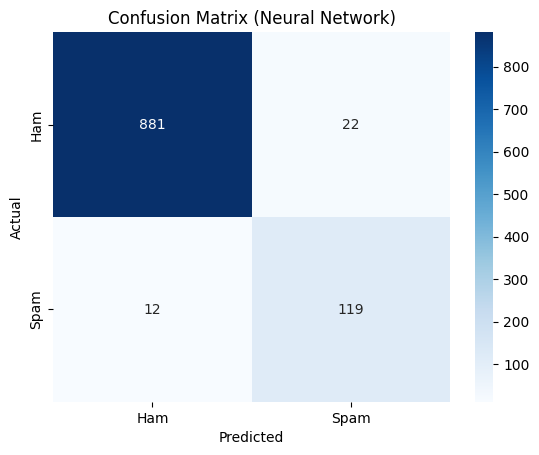

In [55]:
# Visualize what is being caught and missed
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'],
            yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Neural Network)')
plt.show()

Even though this shows Spam recall to be much better, the precision is below 70 - 80%. This means that many messages were flagged as Spam when they actually were not Spam (90, to be precise).

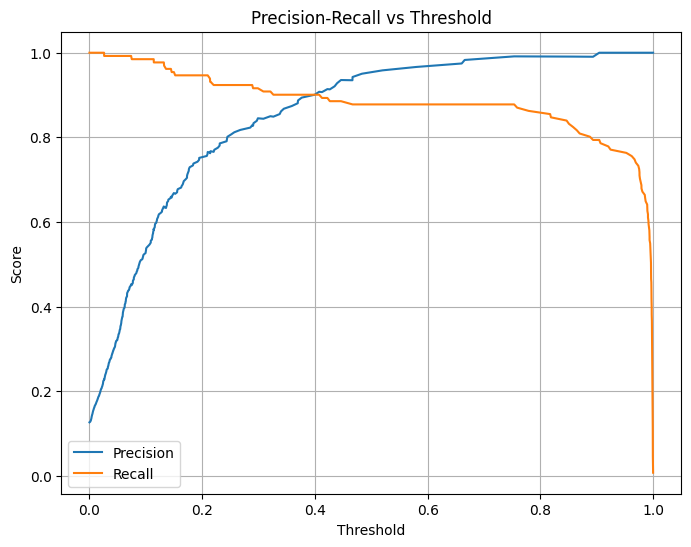

In [56]:
# Precision-Recall Curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

This appears to show that the exact threshold where recall and precision are both acceptable would be 0.65.

In [57]:
# Comparing the two models (Oversampling and NN)
y_pred_prob = model.predict(X_test_pad).flatten()
y_pred = (y_pred_prob >= 0.65).astype(int)  # You can also try 0.4 or 0.3

print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       903
        Spam       0.97      0.88      0.92       131

    accuracy                           0.98      1034
   macro avg       0.98      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034



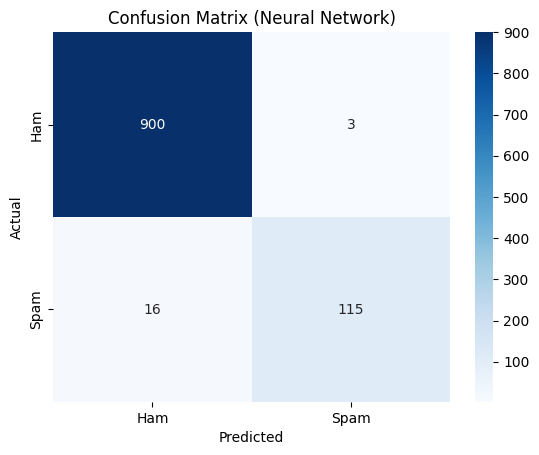

In [58]:
# Visualize what is being caught and missed
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'],
            yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Neural Network)')
plt.show()

This does appear to be the exact threshold of recall and precision.

In the real-world, recall is prioritized, but precision is still kept above 70–80%.




In [59]:
# Comparing the two models (Oversampling and NN)
y_pred_prob = model.predict(X_test_pad).flatten()
y_pred = (y_pred_prob >= 0.4).astype(int)  # You can also try 0.4 or 0.3

print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       903
        Spam       0.91      0.90      0.90       131

    accuracy                           0.98      1034
   macro avg       0.95      0.94      0.95      1034
weighted avg       0.98      0.98      0.98      1034



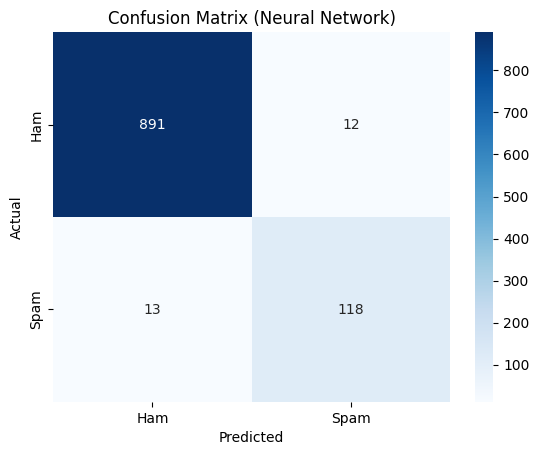

In [60]:
# Visualize what is being caught and missed
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'],
            yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Neural Network)')
plt.show()

This is the absolute lowest I should go before precision drops below 70%. Neural Networks did not improve compared to After Oversampling.

In [61]:
# Model Comparision
print("=" * 40)
print("MODEL COMPARISON")
print("=" * 40)

print("\n📦 After Oversampling (e.g., Logistic Regression)")
print("-" * 40)
print(classification_report(y_test, y_pred_ros, target_names=['Ham', 'Spam']))

print("\n🧠 Neural Network")
print("-" * 40)
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

MODEL COMPARISON

📦 After Oversampling (e.g., Logistic Regression)
----------------------------------------
              precision    recall  f1-score   support

         Ham       1.00      0.97      0.98       903
        Spam       0.82      0.97      0.89       131

    accuracy                           0.97      1034
   macro avg       0.91      0.97      0.94      1034
weighted avg       0.97      0.97      0.97      1034


🧠 Neural Network
----------------------------------------
              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       903
        Spam       0.91      0.90      0.90       131

    accuracy                           0.98      1034
   macro avg       0.95      0.94      0.95      1034
weighted avg       0.98      0.98      0.98      1034





---



# **Conclusion**

## **After Oversampling outperforms Neural Networks**

Compared to Neural Networks, after Oversampling had higher F1 Score, recall, and precision.

## **Why did After Oversampling outperform Neural Networks?**

1) The oversampling model capitalized on the surface-level text patterns common in spam messages, which made a linear classifier a natural fit for this type of classification.

2) Because SMS messages are short, TF-IDF effectively isolated spam-related keywords, allowing the oversampling model to learn discriminative features with relatively little complexity.

3) Oversampling balanced the training data, allowing the classifier to learn spam characteristics more effectively. This contributed to a higher recall rate, which was the primary objective of the project.

4) Although neural networks are capable of learning more abstract patterns, the shallow architecture used here may have been insufficient for capturing nuanced relationships in the text.

5) Training word embeddings from scratch limited the model's ability to generalize beyond the training set. Using pretrained embeddings or models like BERT may improve performance in future work.
